### GATHER DATA AND KNOW YOUR DATA.

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


#### 1. PROBLEM DEFINITION.
> Given clinical parameters about a patint, can we predict whether or not they have heart disease.

#### 2. DATA.
The original data came from Cleveland data from UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Another version of the data is available on KAGGLE.
https://www.kaggle.com/ronitf/heart-disease-uci

#### 3. EVALUATION.
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept , we'll pursue the project.

#### 4. FEATURES.
> In this section define all the features of the data for better understanding:

1. age
2. sex
3. chest pain type (4 values)
3. resting blood pressure
4. serum cholestoral in mg/dl
5. fasting blood sugar > 120 mg/dl
6. resting electrocardiographic results (values 0,1,2)
7. maximum heart rate achieved
8. exercise induced angina
9. oldpeak = ST depression induced by exercise relative to rest
10. the slope of the peak exercise ST segment
11. number of major vessels (0-3) colored by flourosopy
12. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
13. target 0 or 1

### DATA EXPLORATION.
The goal here is to find out more about the data we are working on:
1. What questions you are trying to solve?
2. HADLING THE MISSING VALUES.
3. Outliers in the data.
4. How to improve the efficiency of the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

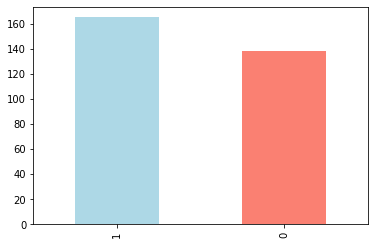

In [4]:
data["target"].value_counts().plot(kind = "bar" , color=["lightblue" , "salmon"]);

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### SUB-PLOTS OF AGE v/s CHOLESTROL   , AGE v/s THALACH

Text(0.5, 0.98, 'HEART DISEASE ANALYSIS')

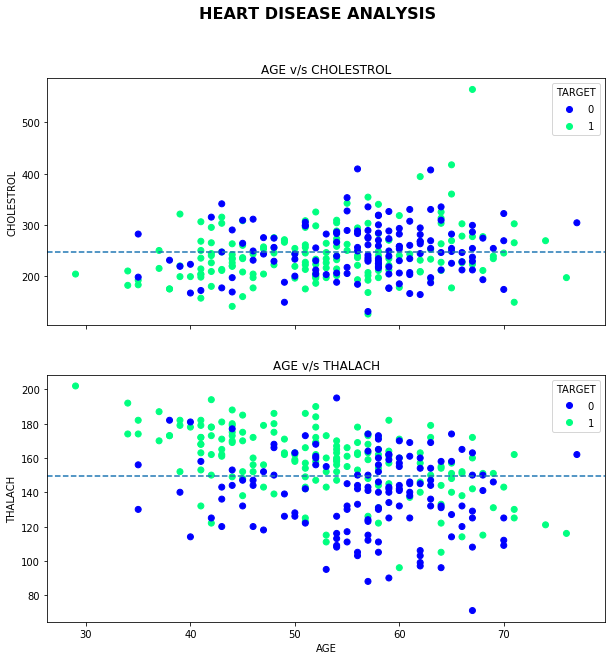

In [8]:
fig , (ax0,ax1) = plt.subplots(nrows = 2 ,ncols=1,figsize=(10,10) , sharex=True )
sc1 = ax0.scatter(x = data["age"],y = data["chol"] , c = data["target"],cmap="winter")
ax0.set(title="AGE v/s CHOLESTROL" ,ylabel = "CHOLESTROL")
ax0.legend(*sc1.legend_elements(),title="TARGET")
ax0.axhline(data["chol"].mean(),linestyle ="--")

sc2 = ax1.scatter(x=data["age"] , y=data["thalach"] , c=data["target"],cmap="winter")
ax1.set(title="AGE v/s THALACH",xlabel="AGE" ,ylabel = "THALACH")
ax1.legend(*sc2.legend_elements(),title="TARGET")
ax1.axhline(data["thalach"].mean(),linestyle ="--")

fig.suptitle("HEART DISEASE ANALYSIS" ,fontsize=16 ,fontweight="bold")

In [9]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

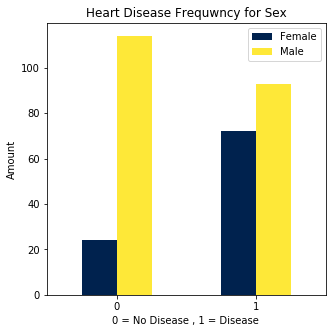

In [10]:
pd.crosstab(data.target , data.sex).plot(kind="bar" ,figsize=(5,5) , cmap="cividis")
plt.title("Heart Disease Frequwncy for Sex")
plt.xlabel("0 = No Disease , 1 = Disease ")
plt.ylabel("Amount")
plt.legend(["Female" ,"Male"])
plt.xticks(rotation=0)

In [11]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

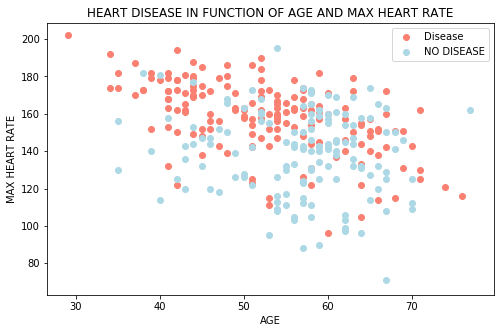

In [12]:
plt.figure(figsize=(8,5))
# positive exapmles
plt.scatter(data.age[data.target==1] , data.thalach[data.target==1],c="salmon")

# negative examples
plt.scatter(data.age[data.target==0] , data.thalach[data.target==0] ,c="lightblue")

plt.title("HEART DISEASE IN FUNCTION OF AGE AND MAX HEART RATE")
plt.xlabel("AGE")
plt.ylabel("MAX HEART RATE")
plt.legend(["Disease","NO DISEASE"])

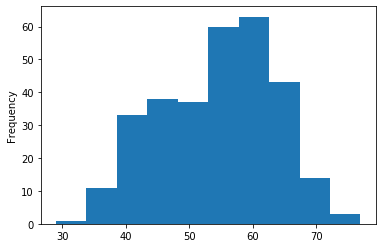

In [13]:
data.age.plot.hist();

#### HEART DISEASE  FREQUENCY V/S CHEST PAIN TYPE

In [14]:
pd.crosstab(data.cp , data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

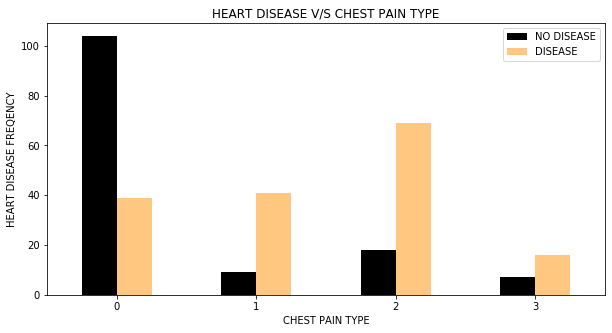

In [15]:
pd.crosstab(data.cp , data.target).plot(kind = "bar",
                                       figsize=(10,5),
                                       cmap="copper")
plt.title("HEART DISEASE V/S CHEST PAIN TYPE")
plt.xlabel("CHEST PAIN TYPE")
plt.ylabel("HEART DISEASE FREQENCY")
plt.legend(["NO DISEASE" , "DISEASE"])
plt.xticks(rotation=0)

In [16]:
# co relation b/w data
cor_mat =data.corr()

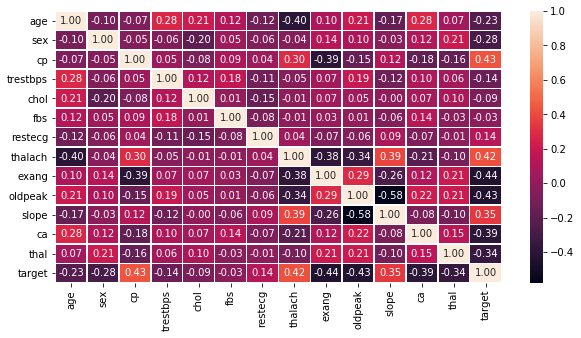

In [17]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(cor_mat ,
                annot=True,
                linewidths=0.5,
                fmt=".2f")

#### MODELLING

In [18]:
## spliting data
x = data.drop("target"  , axis=1)
y = data["target"]

from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2)


### modeling using 3 models.
1. Logistic Regression
2. K-Nearest Neighbours.
3. Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

models = {"Logistic Regression": LogisticRegression(max_iter = 900),
          "KNN": KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier() }
def fit_and_score(models ,x_train ,x_test ,y_train ,y_test):
    """
    Fits and evaluate given machine learning.
    models : dict of different models.
    """
    model_scores = {}
    np.random.seed(42)
    for name , model in models.items():
        model.fit(x_train ,y_train)
        model_scores[name] = model.score(x_test ,y_test)
    return model_scores


In [20]:
model_scores = fit_and_score(models = models , 
                            x_train = x_train,
                            x_test = x_test,
                             y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\hp\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.639344262295082,
 'Random Forest': 0.819672131147541}

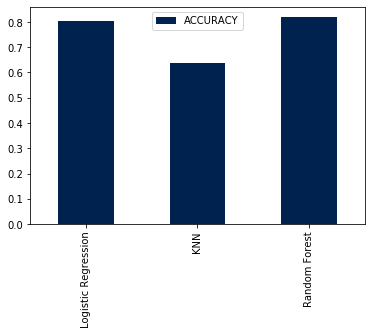

In [21]:
model_compare = pd.DataFrame(model_scores , index=["ACCURACY"])
model_compare.T.plot.bar(cmap="cividis")

##### Improving or Tuning model.
* hyper parameter tuning.
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* f1_score
* Classification Report
* ROC curve

**TUNING KNN CLASSIFIER**

In [22]:
## tuning knn model
train_scores = []
test_scores = []

neighbors = range(1,23)
knn  = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train ,y_train)
    train_scores.append(knn.score(x_train , y_train))
    test_scores.append(knn.score(x_test , y_test))

The maximum accuracy of the KNN IS 72.13%


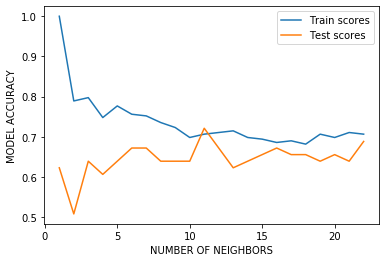

In [23]:
plt.plot(neighbors ,train_scores ,label="Train scores")
plt.plot(neighbors ,test_scores  ,label="Test scores" )
plt.xlabel("NUMBER OF NEIGHBORS")
plt.ylabel("MODEL ACCURACY")
plt.legend(["Train scores" , "Test scores"])
print(f"The maximum accuracy of the KNN IS {max(test_scores)*100:.2f}%")

**TUNING LOGISTIC REGRESSION MODEL**

Using RandomisedSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV

# creating hyper-parameter grid for Logistic Regression model
log_reg_grid = {"C":np.logspace(-4,4 ,20),
               "solver":["liblinear"]}
# creating hyper parameter grid for Random Forest Classifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None , 3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [25]:
# Tuning Logistic Regression model.
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
rs_log_rev = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_rev.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [26]:
rs_log_rev.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [27]:
rs_log_rev.score(x_test,y_test)

0.7868852459016393

In [28]:
# Tuning Randomforrestclassifier
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [29]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [30]:
rs_rf.score(x_test,y_test)

0.819672131147541

In [31]:
model_scores

{'Logistic Regression': 0.8032786885245902,
 'KNN': 0.639344262295082,
 'Random Forest': 0.819672131147541}

#### TUNING MODELS USING GRID SEARCH CV

In [32]:
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV

# creating hyper-parameter grid for Logistic Regression model
log_reg_grid = {"C":np.logspace(-4,4 ,30),
               "solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression() ,
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [33]:
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [34]:
gs_log_reg.score(x_test,y_test)

0.7704918032786885

In [35]:
y_preds = gs_log_reg.predict(x_test)

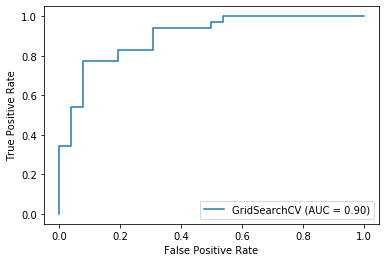

In [36]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_reg , x_test ,y_test )

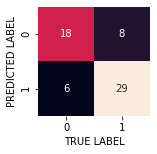

In [37]:
from sklearn.metrics import confusion_matrix
def plot_conf_metrics(y_test ,y_preds):
    """
    plot a confusion matrix.
    """
    fig , ax = plt.subplots(figsize=(2,2))
    ax = sns.heatmap(confusion_matrix(y_test ,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("TRUE LABEL")
    plt.ylabel("PREDICTED LABEL")
plot_conf_metrics(y_test ,y_preds)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        26
           1       0.78      0.83      0.81        35

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.76        61
weighted avg       0.77      0.77      0.77        61



In [41]:
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [49]:
# creating a same model for cross validation.
clf = LogisticRegression(C = 4.893900918477489 , solver = 'liblinear' )

In [67]:
from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf, x,y,cv=5 ,scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8215846994535518

In [68]:
from sklearn.model_selection import cross_val_score
cv_pre = cross_val_score(clf, x,y,cv=5 ,scoring='precision')
cv_pre = np.mean(cv_pre)
cv_pre

0.8179096985548598

In [69]:
from sklearn.model_selection import cross_val_score
cv_rec = cross_val_score(clf, x,y,cv=5 ,scoring='recall')
cv_rec = np.mean(cv_rec)
cv_rec

0.8727272727272727

In [70]:
from sklearn.model_selection import cross_val_score
cv_f1 = cross_val_score(clf, x,y,cv=5 ,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8429665874032072

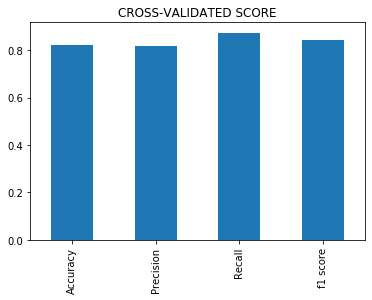

In [76]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_rec,
                         "f1 score":cv_f1},
                         index=[0])
cv_metrics.T.plot(kind="bar" , title="CROSS-VALIDATED SCORE" , legend=False);

### FEATURE IMOPRTANCE

Which features of the data contributed the most to the outcomes of the model and how?

Finding the feature importance is different is different for all models.

One way to find feature imporatance is (MODEL NAME) feature importance.

In [78]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
clf.fit(x_train,y_train)
clf.coef_

array([[ 0.00310535, -1.52383065,  0.8068063 , -0.02172327, -0.00416284,
         0.22090596,  0.35545607,  0.0330716 , -0.76873523, -0.47491759,
         0.55303184, -0.92116993, -1.04075032]])

In [87]:
feature_dict = dict(zip(data.columns , list(clf.coef_[0])))
feature_dict

{'age': 0.003105353741597274,
 'sex': -1.5238306466325222,
 'cp': 0.80680629779052,
 'trestbps': -0.02172326738700877,
 'chol': -0.004162837579554449,
 'fbs': 0.22090595728406195,
 'restecg': 0.35545607377526584,
 'thalach': 0.03307160270241338,
 'exang': -0.7687352279329883,
 'oldpeak': -0.4749175942275311,
 'slope': 0.5530318377649728,
 'ca': -0.9211699300974661,
 'thal': -1.0407503231386788}

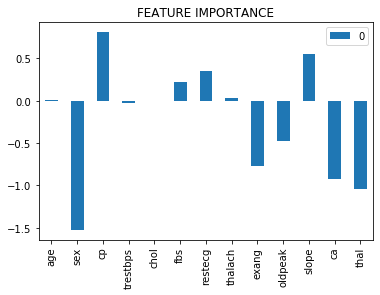

In [91]:
feature_df = pd.DataFrame(feature_dict , index=[0])

feature_df.T.plot.bar(title = "FEATURE IMPORTANCE")

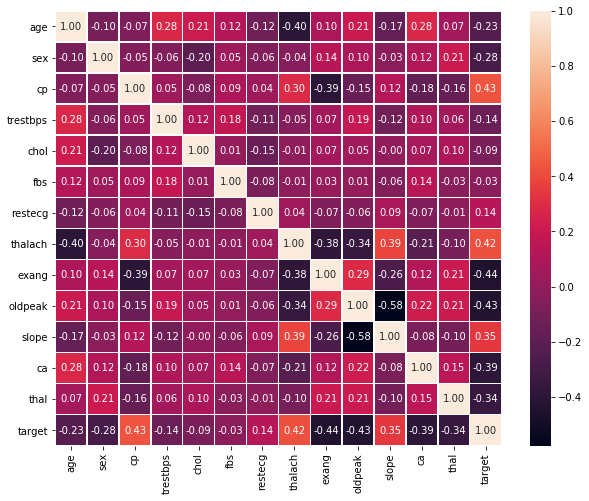

In [94]:
cor_mat = data.corr()
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(cor_mat ,
                annot=True,
                linewidths=0.5,
                fmt=".2f")

In [95]:
pd.crosstab(data.sex , data.target)

target,0,1
sex,,
0,24,72
1,114,93


In [98]:
print(f"THE ACCURACY OF THE MODEL IS : {cv_acc}")

THE ACCURACY OF THE MODEL IS : 0.8215846994535518
